In [17]:
import requests

In [18]:
# a request to localhost:8080

url = "http://localhost:8080"
# url = "https://mypersonaljscloudivnad9dy-readnft.functions.fnc.fr-par.scw.cloud"


my_prompt = "The picture of Las Terrenas in the Dominican Republic in the morning."
tokenId = 0
size="1792x1024"
provider = "bfl"

# send a POST request with the prompt and tokenId in the JSON body
response = requests.post(url,
    json={
        "prompt": my_prompt,
        "tokenId": tokenId,
        "size": size,
        "provider": provider,
    }
)

In [19]:
response.json()

{'metadata_url': 'https://my-imagestore.s3.nl-ams.scw.cloud/metadata/metadata_0_2fb607a33bc7.json',
 'token_id': '0',
 'size': '1792x1024',
 'provider': 'bfl',
 'mode': 'generate',
 'message': 'Bild erfolgreich generiert'}

In [20]:
response.json()

# get the image URL from the metadata and download the image

metadata_url = response.json()["metadata_url"]
metadata_response = requests.get(metadata_url)
metadata_response.json()

{'name': 'AI Generated Art #0',
 'description': 'AI generated artwork based on the prompt: "The picture of Las Terrenas in the Dominican Republic in the morning."',
 'image': 'https://my-imagestore.s3.nl-ams.scw.cloud/images/image_0_eee9cd2221a0.png',
 'attributes': [{'trait_type': 'Prompt',
   'value': 'The picture of Las Terrenas in the Dominican Republic in the morning.'},
  {'trait_type': 'Model', 'value': 'flux-kontext-pro'},
  {'trait_type': 'Image Size', 'value': '1792x1024'},
  {'trait_type': 'Creation Date', 'value': '2025-09-22T19:07:36.570Z'}]}

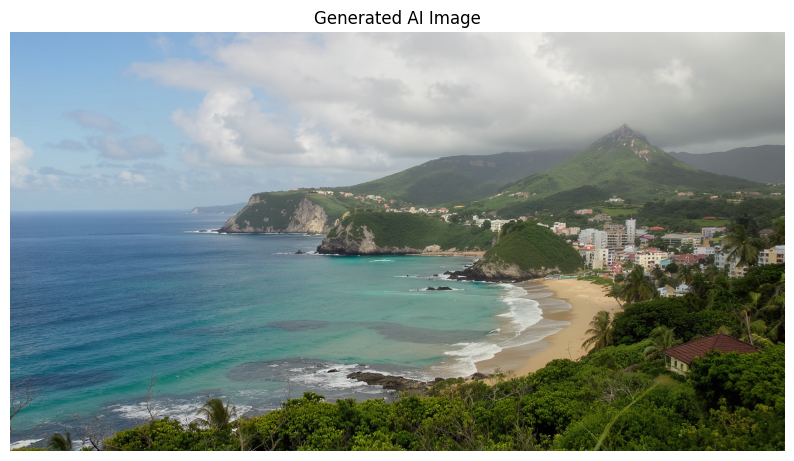

In [21]:
# plot the image 
import matplotlib.pyplot as plt
import requests
from PIL import Image
import io

image_url = metadata_response.json()['image']

# Download the image from URL
image_response = requests.get(image_url)
image = Image.open(io.BytesIO(image_response.content))

# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("Generated AI Image")
plt.show()

save the image for later loading

In [22]:
# save the image for later loading
image.save("generated_image.png", format='PNG', quality=70, optimize=True)  # Save as PNG with optimization

# Edit the image

Now also call the API and edit the image.

In [42]:
my_edit_prompt = "The lighting should change and you should see the sun going down behind the mountains."

# change the initial image into base64
import base64
with open("generated_image.png", "rb") as image_file:
    referenceImageBase64 = base64.b64encode(image_file.read()).decode('utf-8')

# call the API in edit mode using POST request
edit_response = requests.post(url,
    json={
        "prompt": my_edit_prompt,    # Fixed: use my_edit_prompt instead of my_prompt
        "tokenId": tokenId,
        "size": size,
        "provider": provider,
        "mode": "edit",
        "referenceImage": referenceImageBase64,
    }
)

In [41]:
edit_response.json()

{'statusCode': 413,
 'code': 'FST_ERR_CTP_BODY_TOO_LARGE',
 'error': 'Payload Too Large',
 'message': 'Request body is too large'}

In [36]:
# get the image URL from the metadata and download the image

metadata_url = edit_response.json()["metadata_url"]
metadata_response = requests.get(metadata_url)
metadata_response.json()

{'name': 'AI Generated Art #0',
 'description': 'AI generated artwork based on the prompt: "The lighting should change and you should see the sun going down behind the mountains."',
 'image': 'https://my-imagestore.s3.nl-ams.scw.cloud/images/image_0_7b43bad491b5.png',
 'attributes': [{'trait_type': 'Prompt',
   'value': 'The lighting should change and you should see the sun going down behind the mountains.'},
  {'trait_type': 'Model', 'value': 'flux-kontext-pro'},
  {'trait_type': 'Image Size', 'value': '1792x1024'},
  {'trait_type': 'Creation Date', 'value': '2025-09-22T19:19:50.674Z'}]}

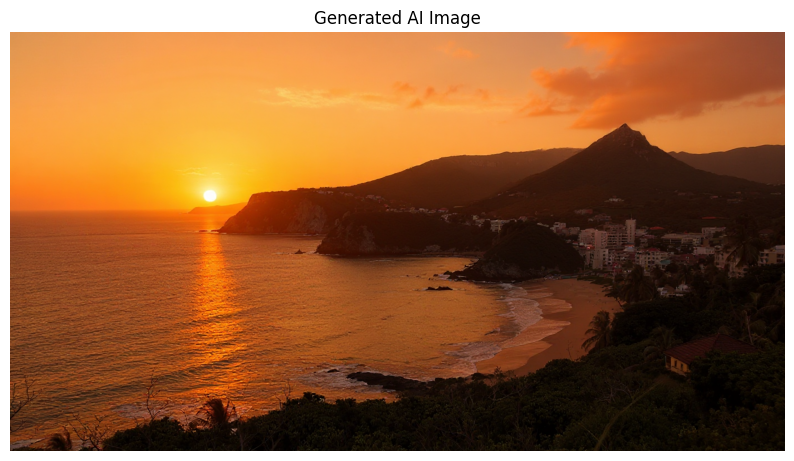

In [37]:
# plot the image
import matplotlib.pyplot as plt
import requests
from PIL import Image
import io

image_url = metadata_response.json()["image"]

# Download the image from URL
image_response = requests.get(image_url)
image = Image.open(io.BytesIO(image_response.content))

# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title("Generated AI Image")
plt.show()